In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [12]:
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

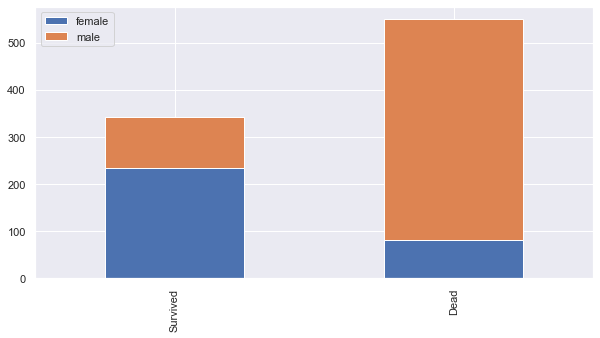

In [13]:
bar_chart('Sex')

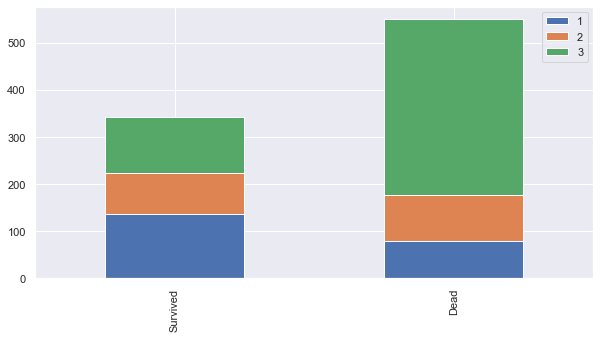

In [14]:
bar_chart('Pclass')

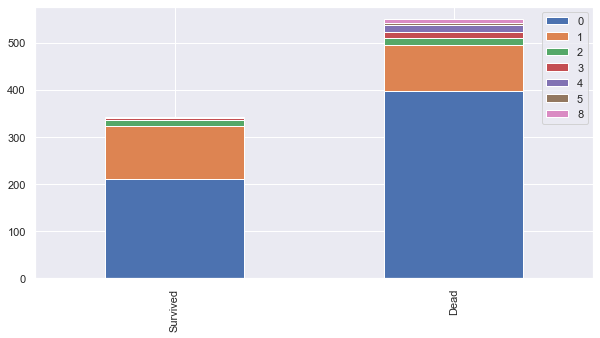

In [15]:
bar_chart('SibSp')

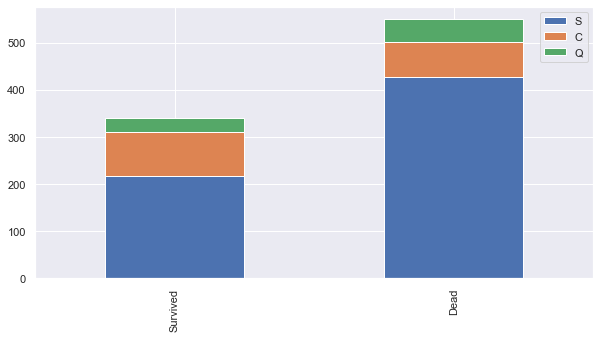

In [16]:
bar_chart('Embarked')

In [17]:
train_test_data=[train,test]

In [18]:
for i in train_test_data:
    i['Title']=i['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Don           1
Ms            1
Sir           1
Jonkheer      1
Mme           1
Capt          1
Lady          1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [21]:
title_mapping={'Mr':0,'Miss':1,'Mrs':2,'Master':3,'Dr':3,'Rev':3,'Col':3,'Major':3,'Mlle':3,'Lady':3,'Sir':3,'Jonkheer':3,
              'Ms':3,'Mme':3,'Countess':3,'Capt':3,'Don':3,'Dona':3}
for i in train_test_data:
    i['Title']=i['Title'].map(title_mapping)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


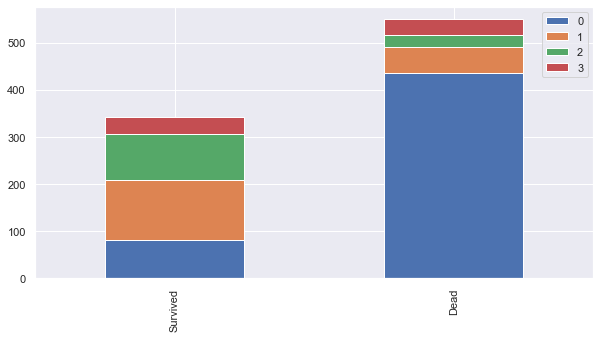

In [24]:
bar_chart('Title')

In [25]:
train.drop(['Name'],axis=1,inplace=True)
test.drop(['Name'],axis=1,inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train.Sex=le.fit_transform(train.Sex)

In [28]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,NaN,S,3
887,888,1,1,0,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,1,26.0,0,0,111369,30.0000,C148,C,0


In [29]:
test.Sex=le.fit_transform(test.Sex)
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,0,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,0,22.0,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,0,39.0,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,1,NaN,0,0,359309,8.0500,NaN,S,0


In [30]:
train.Age=train.fillna(train.Age.mean())

In [31]:
test.Age=test.fillna(test.Age.mean())

In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [33]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,2,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,3,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,4,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,5,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,887,0,0,211536,13.0000,NaN,S,3
887,888,1,1,0,888,0,0,112053,30.0000,B42,S,1
888,889,0,3,0,889,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,1,890,0,0,111369,30.0000,C148,C,0


In [47]:
train.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [48]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,1,1,0,7.2500,S,0
1,2,1,1,0,2,1,0,71.2833,C,2
2,3,1,3,0,3,0,0,7.9250,S,1
3,4,1,1,0,4,1,0,53.1000,S,2
4,5,0,3,1,5,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,887,0,0,13.0000,S,3
887,888,1,1,0,888,0,0,30.0000,S,1
888,889,0,3,0,889,1,2,23.4500,S,1
889,890,1,1,1,890,0,0,30.0000,C,0


In [49]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [50]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [51]:
train.drop(['Embarked'],axis=1,inplace=True)

In [52]:
train=pd.concat([train,embark],axis=1)

In [53]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Q,S
0,1,0,3,1,1,1,0,7.2500,0,0,1
1,2,1,1,0,2,1,0,71.2833,2,0,0
2,3,1,3,0,3,0,0,7.9250,1,0,1
3,4,1,1,0,4,1,0,53.1000,2,0,1
4,5,0,3,1,5,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,887,0,0,13.0000,3,0,1
887,888,1,1,0,888,0,0,30.0000,1,0,1
888,889,0,3,0,889,1,2,23.4500,1,0,1
889,890,1,1,1,890,0,0,30.0000,0,0,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('Survived',axis=1),train['Survived'],
                                                test_size=0.30,random_state=101)

In [56]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Q,S
520,521,1,0,521,0,0,93.5000,1,0,1
510,511,3,1,511,0,0,7.7500,0,1,0
446,447,2,0,447,0,1,19.5000,1,0,1
2,3,3,0,3,0,0,7.9250,1,0,1
691,692,3,0,692,0,1,13.4167,1,0,0
...,...,...,...,...,...,...,...,...,...,...
575,576,3,1,576,0,0,14.5000,0,0,1
838,839,3,1,839,0,0,56.4958,0,0,1
337,338,1,0,338,0,0,134.5000,1,0,0
523,524,1,0,524,0,1,57.9792,2,0,0


In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
predictions=model.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [68]:
cm=confusion_matrix(y_test,predictions)

In [69]:
cm

array([[135,  19],
       [ 40,  74]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(y_test,predictions)

0.7798507462686567

In [72]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [78]:
pred=pd.DataFrame(predictions)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False)

In [79]:
datasets

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,NaN
414,1306,NaN
415,1307,NaN
416,1308,NaN


In [82]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,1,892,0,0,330911,7.8292,NaN,Q,0
1,893,3,0,893,1,0,363272,7.0000,NaN,S,2
2,894,2,1,894,0,0,240276,9.6875,NaN,Q,0
3,895,3,1,895,0,0,315154,8.6625,NaN,S,0
4,896,3,0,896,1,1,3101298,12.2875,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1305,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,0,1306,0,0,PC 17758,108.9000,C105,C,3
415,1307,3,1,1307,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,1,1308,0,0,359309,8.0500,NaN,S,0


In [83]:
test.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [87]:
emb=pd.get_dummies(test['Embarked'],drop_first=True)

In [88]:
emb

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
413,0,1
414,0,0
415,0,1
416,0,1


In [89]:
test.drop(['Embarked'],axis=1,inplace=True)

In [90]:
test=pd.concat([test,emb],axis=1)

In [94]:
test.Fare=test.Fare.fillna(test.Fare.mean())

In [95]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Title          0
Q              0
S              0
dtype: int64

In [96]:
p=model.predict(test)

In [97]:
p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [93]:
test.Fare=test.Fare.fillna(test.Fare.mean)
pred=pd.DataFrame(predictions)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],pred],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Title          0
Q              0
S              0
dtype: int64

In [98]:
predict=pd.DataFrame(p)
sub_df=pd.read_csv('gender_submission.csv')
datasets=pd.concat([sub_df['PassengerId'],predict],axis=1)
datasets.columns=['PassengerId','Survived']
datasets.to_csv('gender_submission.csv',index=False)